# Ejercicio 1: Preparar el ambiente de trabajo

In [219]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [220]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [221]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [222]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Ejercicio 2: Descripción

In [223]:
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'blast_furnace_slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
    'Age (day)':'age_day',
    'Concrete compressive strength(MPa, megapascals) ':'concrete_compressive_strength'
})

In [224]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age_day',
       'concrete_compressive_strength'],
      dtype='object')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age_day                        1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [226]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age_day,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


    Como el rango de lo valores es muy amplio se hará una estandarización de estos

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [228]:
df_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age_day,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,0.506781
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733,-0.277762
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733,-0.725729
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733,-0.182539


    En este caso se hizo una estandarización de los datos pero no es necesario para el modelo de pygam de más adelante, ya que en ese proceso se realiza para los datos de entrenamiento y pruebas.

# Ejercicio 3: Modelo

In [229]:
from pygam import LinearGAM, s
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

X_train_pre, X_test_pre, y_train, y_test = train_test_split(df.drop('concrete_compressive_strength', axis=1),
                                                            df['concrete_compressive_strength'], test_size =.3, random_state = 63)

# Ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)

# Con el estandarizador ajustado sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarización
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)

# Transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

### Modelo 1

In [230]:
gam_1 = LinearGAM().fit(X_train.values, y_train.values)
gam_1

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [231]:
gam_1.lam

[[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]

In [232]:
gam_1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.0475
Link Function:                     IdentityLink Log Likelihood:                                 -3068.8229
Number of Samples:                          721 AIC:                                             6299.7409
                                                AICc:                                            6320.5554
                                                GCV:                                               34.5198
                                                Scale:                                             27.6979
                                                Pseudo R-Squared:                                   0.9138
Feature Function                  Lam

In [233]:
def report_gam_metrics(model, X_test, y_test):
    print(f'Test R^2: {r2_score(y_test, model.predict(X_test)).round(3)}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)}')
    print(f'Test MAE: {median_absolute_error(y_test, model.predict(X_test)).round(3)}')
report_gam_metrics(gam_1, X_test, y_test)

Test R^2: 0.894
Test RMSE: 5.265
Test MAE: 3.763


### Modelo 2

In [234]:
lams = np.logspace(-3, 3, 3)
lams = [lams]* len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [235]:
gam_2 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)

In [236]:
gam_2.gridsearch(X_train.values, y_train.values, lam=lams)

  0% (0 of 6561) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (2 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:07:47
  0% (4 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:08:19
  0% (6 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:08:11
  0% (8 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:08:02
  0% (10 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:07:54
  0% (12 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:07:55
  0% (14 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:07:59
  0% (16 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:07:59
  0% (18 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:08:00
  0% (20 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:07:59
  0% (22 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:07:58
  0% (24 of 6561) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [237]:
gam_2.lam

[[1000.0], [0.001], [1.0], [0.001], [0.001], [1.0], [1.0], [0.001]]

In [238]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     90.3768
Link Function:                     IdentityLink Log Likelihood:                                 -3024.1029
Number of Samples:                          721 AIC:                                             6230.9594
                                                AICc:                                            6257.8152
                                                GCV:                                               33.4672
                                                Scale:                                             26.0122
                                                Pseudo R-Squared:                                   0.9204
Feature Function                  Lam

In [239]:
report_gam_metrics(gam_2, X_test, y_test)

Test R^2: 0.886
Test RMSE: 5.467
Test MAE: 3.721


In [240]:
df.concrete_compressive_strength.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: concrete_compressive_strength, dtype: float64

    Para el modelo 2, la penalización para la columna 'cement', representada por el término s(0) es la más alta con un valor de 1000.

    Respecto a las métricas de desempeño estas son similares en ambos modelos. En el primer modelo los valores obtenidos fueron:
    Test R^2: 0.894
    Test RMSE: 5.265
    Test MAE: 3.763

    Y en el segundo modelo los valores obtenidos fueron:
    Test R^2: 0.886
    Test RMSE: 5.467
    Test MAE: 3.721

    Al observar los valores de MAE calculados, este es menor en el segundo modelo. Una explicación de este valor podría ser: Para el vector objetivo, cuya media es 35.817961 MPa y suponiendo una fuerza de compresión igual, el modelo predice una fuerza 35.817961 - 3.721 = 32.096961 MPa o 35.817961 + 3.721 = 39.538961 MPa.
    Dependiendo de los márgenes de errores que se tengan considerados para las vigas de concreto, los resultados obtenidos de los modelos pueden considerarse buenos o no.

# Ejercicio 4: Dependencia Parcial

In [241]:
def dep_parcial_report(model):
    """
    Esta función reporta una grilla con todos los gráficos de dependencia parcial para un modelo dado.

    Parameters
    -----------
    model: variable
            modelo del cual se obtienen los datos para los gráficos de dependencia parcial
    
    Returns
            None
    """

    fig, axs = plt.subplots(2,4, figsize=(20,6));
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i)
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker='|', alpha=.5)
        ax.set_title(titles[i]);

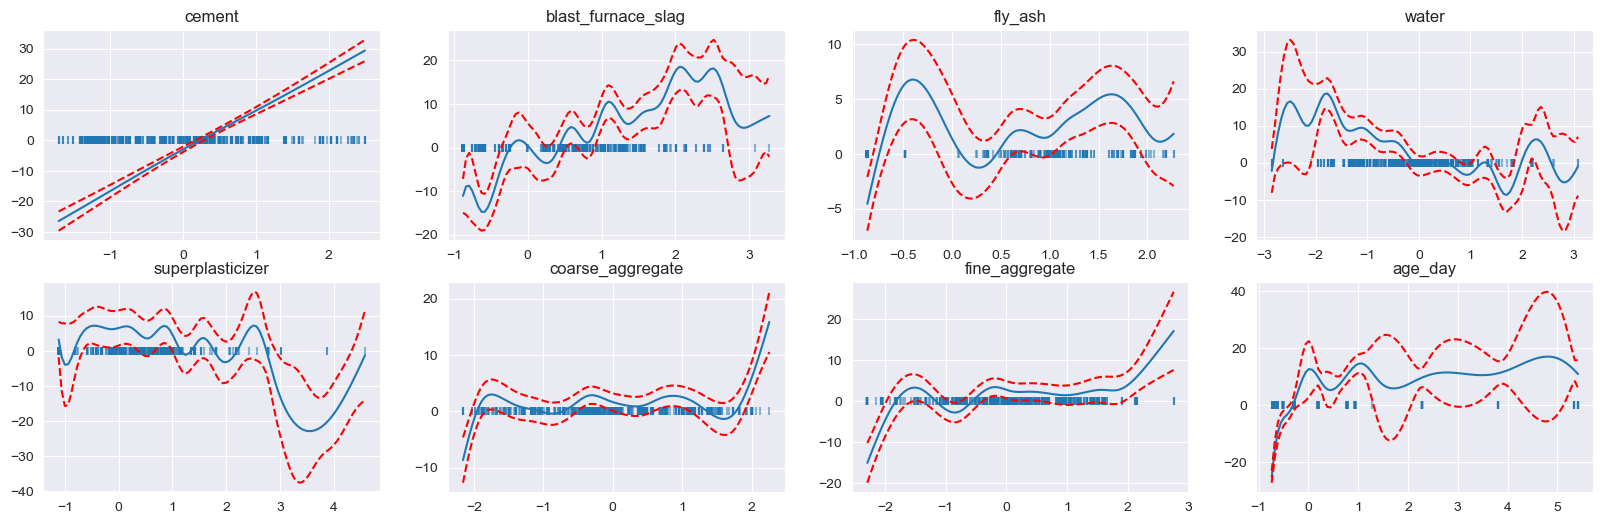

In [242]:
dep_parcial_report(gam_2)

    Los niveles de resistencia en el contexto de GAM, se refieren a los valores de la variable predictora en los cuales se espera que la función de respuesta cambie su dirección o su tasa de cambio.

    Con esto en mente, los atributos que presentan un mayor nivel de resistencia son 'blast_furnace_slag', 'fly_ash', 'water' y 'superplasticizer'. El resto de atributos presenta un menor nivel de resistencia.